In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
import random

# Part 4

## 4.1
#### Save your best performed model in part 3. Then reload the saved model and continue to train for 10 epochs. Show both your training accuracy and validation accuracy curves

In [2]:
# Saved the data in another file 
# Need to download the data
from tensorflow.keras.datasets import cifar10

In [3]:
# Need to re-load the data in order to continue training
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [4]:
# Expand our data set by flipping the images across the vertical axis
flip_train_images = []
for i in range(len(train_images)):
    img = np.fliplr(train_images[i])
    flip_train_images.append(img)

In [5]:
all_train_images = np.append(train_images, flip_train_images, axis = 0)
all_train_labels = np.append(train_labels, train_labels, axis = 0)

[8]


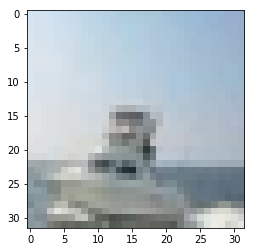

In [6]:
plt.imshow(all_train_images[100])
print(all_train_labels[100])

[8]


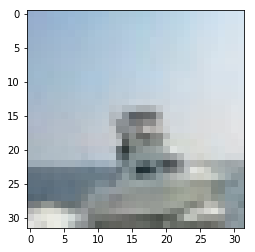

In [7]:
plt.imshow(all_train_images[50100])
print(all_train_labels[50100])

In [8]:
print('Number of images in the training set:', len(all_train_images))

print('Number of images in the test set: ', len(test_images))

Number of images in the training set: 100000
Number of images in the test set:  10000


In [9]:
# Normalize the Data
all_train_images = all_train_images.astype('float32')/255

test_images = test_images.astype('float32')/255

In [10]:
# Need to make the labels categorical form
from tensorflow.keras.utils import to_categorical

In [11]:
train_labels_categorical = to_categorical(all_train_labels)

test_labels_categorical = to_categorical(test_labels)

In [12]:
test_labels_categorical[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
# Isolate validation data
# Create a list of random integers between 0 and 50,000
num_val_samples = 10000

shuffle_indices = random.sample(range(0,100000), num_val_samples)

# Train images with random indices become new validation set
val_images = all_train_images[shuffle_indices]
val_labels = all_train_labels[shuffle_indices]
val_labels_categorical = train_labels_categorical[shuffle_indices]

# Remove the validation set from the training set 
all_train_images = np.delete(all_train_images, shuffle_indices, axis=0)
all_train_labels = np.delete(all_train_labels, shuffle_indices, axis=0)
train_labels_categorical = np.delete(train_labels_categorical, shuffle_indices, axis=0)

In [14]:
val_images.shape

(10000, 32, 32, 3)

In [15]:
# Load the trained model
trained_model = tf.keras.models.load_model('cifar10_bs1000')

In [16]:
trained_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)         

In [17]:
# Train for 10 more epochs
num_epochs = 10
bs = 500


history = trained_model.fit(all_train_images, train_labels_categorical, 
                    validation_data=(val_images, val_labels_categorical), 
                    epochs=num_epochs, batch_size=bs, verbose=1)

Train on 90000 samples, validate on 10000 samples
Epoch 1/10
90000/90000 [==============================] - 19s 206us/sample - loss: 0.2726 - accuracy: 0.9145 - val_loss: 0.0949 - val_accuracy: 0.9818
Epoch 2/10
90000/90000 [==============================] - 14s 160us/sample - loss: 0.2607 - accuracy: 0.9187 - val_loss: 0.1143 - val_accuracy: 0.9742
Epoch 3/10
90000/90000 [==============================] - 14s 160us/sample - loss: 0.2629 - accuracy: 0.9171 - val_loss: 0.1204 - val_accuracy: 0.9692
Epoch 4/10
90000/90000 [==============================] - 15s 162us/sample - loss: 0.2568 - accuracy: 0.9190 - val_loss: 0.0959 - val_accuracy: 0.9761
Epoch 5/10
90000/90000 [==============================] - 14s 160us/sample - loss: 0.2576 - accuracy: 0.9186 - val_loss: 0.1085 - val_accuracy: 0.9713
Epoch 6/10
90000/90000 [==============================] - 14s 161us/sample - loss: 0.2529 - accuracy: 0.9198 - val_loss: 0.1052 - val_accuracy: 0.9755
Epoch 7/10
90000/90000 [====================

In [18]:
epoch_range = list(range(1, num_epochs+1))
training_loss = history.history['loss']
val_loss = history.history['val_loss']

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Loss')

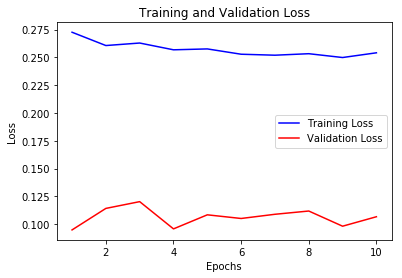

In [19]:
plt.plot(epoch_range, training_loss, 'b', label='Training Loss')
plt.plot(epoch_range, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

Text(0.5, 1.0, 'Training and Validation Accuracy')

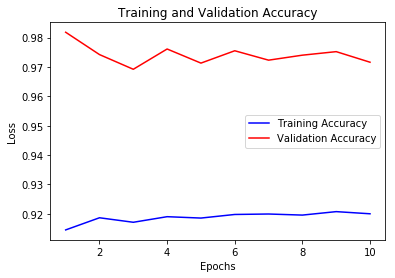

In [20]:
plt.plot(epoch_range, train_acc, 'b', label='Training Accuracy')
plt.plot(epoch_range, val_acc, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Accuracy')

## 4.2
#### Save your newly trained model in 4.1, then reload it. Fix the weights in all the layers before the classification layer(s), and continue to train the classification layer(s) only for another 10 epochs, show bot you trainng and validation curves. 

In [21]:
# Save the model that was trained in 4.1
trained_model.save('extra_trained_model.h5')

In [22]:
# Load the model
new_model = tf.keras.models.load_model('extra_trained_model.h5')

In [23]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)         

In [24]:
print('Number of trainable weights before freezing conv blocks: ', len(new_model.trainable_weights))

Number of trainable weights before freezing conv blocks:  26


In [25]:
# Freeze all the convolutional layers. Leave all the dense layers(the classification layers) to be trained
for row in range(0,19):
    layer = new_model.layers[row]
    layer.trainable = False
    
    print(layer, layer.trainable)

<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdeb43854e0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdeb4385940> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fdeb43916a0> False
<tensorflow.python.keras.layers.core.Dropout object at 0x7fdeb4391748> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdeb4397278> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdeb43a6710> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fdeb43ae5f8> False
<tensorflow.python.keras.layers.core.Dropout object at 0x7fdeb43ae4e0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdeb4335048> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdeb433ff60> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fdeb4347358> False
<tensorflow.python.keras.layers.core.Dropout object at 0x7fdeb4347f28> False
<ten

In [26]:
print('Number of trainable weights after freezing conv blocks: ', len(new_model.trainable_weights))

Number of trainable weights after freezing conv blocks:  8


In [27]:
# Compile the model
opt = keras.optimizers.Adadelta(learning_rate=1.0)
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
# Train for another 10 epochs
num_epochs = 10
bs = 500


history = new_model.fit(all_train_images, train_labels_categorical, 
                    validation_data=(val_images, val_labels_categorical), 
                    epochs=num_epochs, batch_size=bs, verbose=1)

Train on 90000 samples, validate on 10000 samples
Epoch 1/10
90000/90000 [==============================] - 7s 75us/sample - loss: 0.2273 - accuracy: 0.9281 - val_loss: 0.0978 - val_accuracy: 0.9743
Epoch 2/10
90000/90000 [==============================] - 6s 67us/sample - loss: 0.2257 - accuracy: 0.9284 - val_loss: 0.1006 - val_accuracy: 0.9749
Epoch 3/10
90000/90000 [==============================] - 6s 67us/sample - loss: 0.2284 - accuracy: 0.9277 - val_loss: 0.0972 - val_accuracy: 0.9759
Epoch 4/10
90000/90000 [==============================] - 6s 67us/sample - loss: 0.2271 - accuracy: 0.9277 - val_loss: 0.0990 - val_accuracy: 0.9767
Epoch 5/10
90000/90000 [==============================] - 6s 67us/sample - loss: 0.2239 - accuracy: 0.9296 - val_loss: 0.0907 - val_accuracy: 0.9778
Epoch 6/10
90000/90000 [==============================] - 6s 67us/sample - loss: 0.2276 - accuracy: 0.9273 - val_loss: 0.0970 - val_accuracy: 0.9747
Epoch 7/10
90000/90000 [==============================] 

In [29]:
epoch_range = list(range(1, num_epochs+1))
training_loss = history.history['loss']
val_loss = history.history['val_loss']

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Loss')

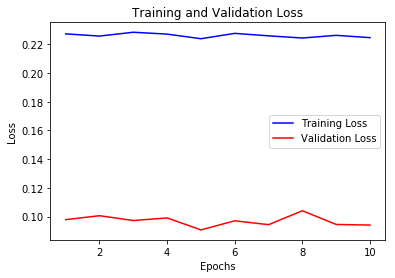

In [30]:
plt.plot(epoch_range, training_loss, 'b', label='Training Loss')
plt.plot(epoch_range, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

Text(0.5, 1.0, 'Training and Validation Accuracy')

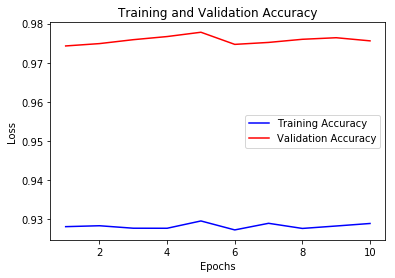

In [31]:
plt.plot(epoch_range, train_acc, 'b', label='Training Accuracy')
plt.plot(epoch_range, val_acc, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Accuracy')

## 4.3 
#### Use the same base model (without the classification layers) in 4.2, and add a new classifier layer, and train the new classifier layer from scratch. show both your training and vlaidation curves. 

In [32]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)         

In [33]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [34]:
# The only way we can figure out how to do this is by creating a new model with the layers from the trained model
conv_layers = new_model.layers[:19]

classifier_layers= new_model.layers[19:]

In [35]:
# new model
edited_model = models.Sequential()

# add conv layers to the new model
for layer in conv_layers:
    edited_model.add(layer)

# add some classifier layers to the new model 
for layer in classifier_layers[:7]:
    edited_model.add(layer)
    
# add a new layer
edited_model.add(layers.Dense(2048, activation='relu'))



In [36]:
# add the last layer of the orginal classifiers
edited_model.add(classifier_layers[7])

In [37]:
# Compile the model
opt = keras.optimizers.Adadelta(learning_rate=1.0)
edited_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
edited_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0

In [39]:
# Train the model 
# Train for 10 more epochs
num_epochs = 50
bs = 500


history = edited_model.fit(all_train_images, train_labels_categorical, 
                    validation_data=(val_images, val_labels_categorical), 
                    epochs=num_epochs, batch_size=bs, verbose=1)

Train on 90000 samples, validate on 10000 samples
Epoch 1/50
90000/90000 [==============================] - 8s 85us/sample - loss: 0.3443 - accuracy: 0.9172 - val_loss: 0.1130 - val_accuracy: 0.9726
Epoch 2/50
90000/90000 [==============================] - 7s 77us/sample - loss: 0.2338 - accuracy: 0.9282 - val_loss: 0.1007 - val_accuracy: 0.9744
Epoch 3/50
90000/90000 [==============================] - 7s 77us/sample - loss: 0.2288 - accuracy: 0.9279 - val_loss: 0.0974 - val_accuracy: 0.9749
Epoch 4/50
90000/90000 [==============================] - 7s 77us/sample - loss: 0.2295 - accuracy: 0.9284 - val_loss: 0.1003 - val_accuracy: 0.9736
Epoch 5/50
90000/90000 [==============================] - 7s 77us/sample - loss: 0.2306 - accuracy: 0.9278 - val_loss: 0.1135 - val_accuracy: 0.9746
Epoch 6/50
90000/90000 [==============================] - 7s 77us/sample - loss: 0.2253 - accuracy: 0.9289 - val_loss: 0.1074 - val_accuracy: 0.9745
Epoch 7/50
90000/90000 [==============================] 

Text(0.5, 1.0, 'Training and Validation Loss')

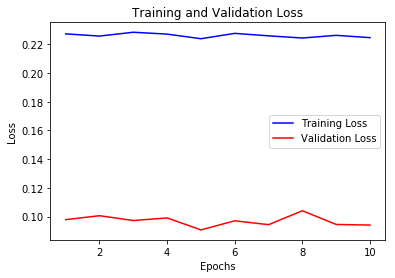

In [40]:
plt.plot(epoch_range, training_loss, 'b', label='Training Loss')
plt.plot(epoch_range, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

Text(0.5, 1.0, 'Training and Validation Accuracy')

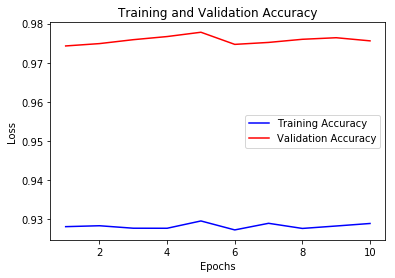

In [41]:
plt.plot(epoch_range, train_acc, 'b', label='Training Accuracy')
plt.plot(epoch_range, val_acc, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Accuracy')